<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

Inspiration drawn from [TaskMartix aka Visual ChatGPT](https://github.com/microsoft/TaskMatrix)

In [1]:
#| echo: false
#| output: asis
show_doc(encode_image)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/openai_vision.py#L29){target="_blank" style="float:right; font-size:smaller"}

### encode_image

>      encode_image (image_path)

In [2]:
#| echo: false
#| output: asis
show_doc(format_image)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/openai_vision.py#L35){target="_blank" style="float:right; font-size:smaller"}

### format_image

>      format_image (image:str, size:int=300)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| image | str |  | Image file path |
| size | int | 300 |  |

In [ ]:
sample_images = glob(f"{SAMPLE_IMG_DIR}/*.jpg")
sample_images

['/home/evylz/AnimalEquality/lv-recipe-chatbot/assets/images/vegan_ingredients/veg-groceries-table.jpg',
 '/home/evylz/AnimalEquality/lv-recipe-chatbot/assets/images/vegan_ingredients/fridge-splendid.jpg',
 '/home/evylz/AnimalEquality/lv-recipe-chatbot/assets/images/vegan_ingredients/veggie-fridge.jpg',
 '/home/evylz/AnimalEquality/lv-recipe-chatbot/assets/images/vegan_ingredients/neat-veg-groceries.jpg',
 '/home/evylz/AnimalEquality/lv-recipe-chatbot/assets/images/vegan_ingredients/fruits-and-vegetables-one-a-table.jpg',
 '/home/evylz/AnimalEquality/lv-recipe-chatbot/assets/images/vegan_ingredients/veg-groceries-table-2.jpg']

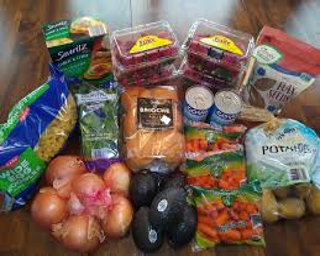

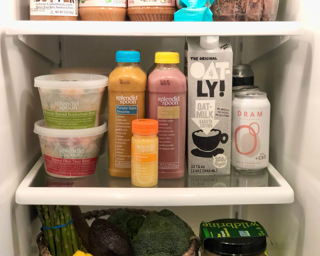

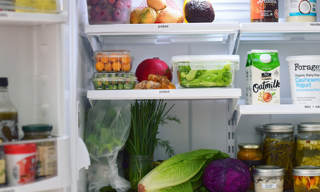

In [ ]:
for img in sample_images[0:3]:
    display(format_image(img))

In [ ]:
client = OpenAI()

_response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What vegan ingredients are in this image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://sweetsimplevegan.com/wp-content/uploads/2019/03/Vegan-Fridge-Tour-Our-Essentials-Sweet-Simple-Vegan-14.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)
_store_json(_response.choices[0].message.content, "first_gptv_test")

skipping


In [ ]:
print(_load_stored_json("first_gptv_test"))

This image shows a well-stocked fridge with a variety of items. Based on what's visible, we can identify several vegan ingredients and items:

1. Fruits & Vegetables: Asparagus, carrots, kale, strawberries, blueberries, lemons, limes, and any other visible produce not clearly identified.
2. Condiments and Sauces: There appear to be bottles that could be plant-based condiments and sauces. It's common to have vegan options among these, like soy sauce, hot sauce, mustards, and some salad dressings.
3. Plant-Based Milk: There seems to be a container that could possibly be a plant-based milk in the door shelf.
4. Nuts: There are jars possibly containing nuts, which are inherently vegan.
5. Hummus: The container in the door could be hummus, which is often vegan.
6. Jars and Cans: The jars and cans might include legumes, vegetables, or vegan spreads that are common in plant-based diets.
7. Vegan Mayonnaise: There is a jar labeled "Vegan Mayonnaise" in one of the door shelves.

Please note tha

<img src="https://sweetsimplevegan.com/wp-content/uploads/2019/03/Vegan-Fridge-Tour-Our-Essentials-Sweet-Simple-Vegan-14.jpg" style="width:300px"/>

In [ ]:
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What’s in this image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{encode_image(sample_images[0])}"
                    },
                },
            ],
        }
    ],
    "max_tokens": 300,
}

response = requests.post(
    "https://api.openai.com/v1/chat/completions", headers=headers, json=payload
)

_store_json(response.json(), 'gptv_test_encode')

skipping


The image shows a collection of various grocery items laid out on a floor. There are fresh produce and packaged goods visible. I see onions, avocados, carrots, and what looks to be a bag of potatoes among the fresh produce. Packaged goods include a box of pasta, a can of beans, and some other items that are not clearly identifiable due to the resolution of the image. It looks like someone's grocery shopping, perhaps recently bought and unpacked.



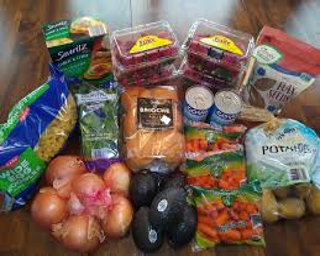

In [ ]:
print(_load_stored_json("gptv_test_encode")["choices"][0]["message"]["content"])
print()
display(format_image(sample_images[0]))

In [3]:
#| echo: false
#| output: asis
show_doc(get_gptv_completion)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/openai_vision.py#L52){target="_blank" style="float:right; font-size:smaller"}

### get_gptv_completion

>      get_gptv_completion (prompt:str, img:str, detail='low')

In [ ]:
_store_json(get_gptv_completion("What is in this image?", sample_images[0]), "get_gptv_comp_test")

In [ ]:
print(_load_stored_json("get_gptv_comp_test"))

The image displays a variety of groceries, including:

- Fresh produce: onions, avocados, potatoes, celery, carrots
- Packaged produce: raspberries, spinach
- Packaged foods: bread, pasta, canned goods, cookies
- Baking supplies: sugar
- Dairy: milk or milk alternative

The items appear to be for general grocery shopping, consisting of both fresh and non-perishable items.


### Image annotations format from cocodataset
> https://cocodataset.org/#detection-2020 

#### Caption annotation set 2014
```json
{
    "info": {
        "description": "COCO 2014 Dataset",
        "url": "http://cocodataset.org",
        "version": "1.0",
        "year": 2014,
        "contributor": "COCO Consortium",
        "date_created": "2017/09/01"
    },
    "images": [
        {
            "license": 3,
            "file_name": "COCO_val2014_000000391895.jpg",
            "coco_url": "http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg",
            "height": 360,
            "width": 640,
            "date_captured": "2013-11-14 11:18:45",
            "flickr_url": "http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg",
            "id": 391895
        },
    ]
    "annotations": [
        {
            "image_id": 522418,
            "id": 681330,
            "caption": "A woman wearing a net on her head cutting a cake. "
        },
    ]
```

#### Panoptic 2017 validation set
```json
    "images": [
        {
            "license": 4,
            "file_name": "000000397133.jpg",
            "coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
            "height": 427,
            "width": 640,
            "date_captured": "2013-11-14 17:02:52",
            "flickr_url": "http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg",
            "id": 397133
        },
        ...
    ]
    "annotations": [
        {"segments_info": [
            {
                "id": 3226956,
                "category_id": 1,
                "iscrowd": 0,
                "bbox": [
                    413,
                    158,
                    53,
                    138
                ],
                "area": 2840
            }]
        "file_name": "000000000139.png",
        "image_id": 139
        }
    ],
    "categories": [
    {
        "supercategory": "person",
        "isthing": 1,
        "id": 1,
        "name": "person"
    },
    ]
```

## Use annotations

In [ ]:
annotations = load_json(f"{SAMPLE_IMG_DIR}/annotations.json")

In [ ]:
display(annotations["images"][0])
display(len(annotations["images"]))

{'file_name': 'fridge-splendid.jpg',
 'ingredients': ['oat milk',
  'brown rice taco bowl',
  'broccoli',
  'asparagus',
  'avocado',
  'nut butter']}

17

Test a layout of the annotation data using ipywidgets

In [ ]:
vboxes = []
for entry in annotations["images"]:
    image_widget = widgets.Image(
        value=open(f"{SAMPLE_IMG_DIR}/{entry['file_name']}", "rb").read(),
        format="png",
        layout=widgets.Layout(max_width="300px", max_height="300px"),
    )
    desc = widgets.HTML(value=f"<p>{'<br/>'.join(entry['ingredients'])}</p>")
    vbox = widgets.VBox(
        [image_widget, desc],
        layout=widgets.Layout(
            min_width="300px", margin="0px 10px 0px 10px", overflow="hidden"
        ),
    )
    vboxes.append(vbox)

# Combine all VBoxes into a single HBox

hbox = widgets.HBox(vboxes, layout=widgets.Layout(overflow="scroll"))

# Display the final layout
display(hbox)

In [ ]:
def eval_ingredient_prompt(prompt: str):
    data = []
    annotations = load_json(f"{SAMPLE_IMG_DIR}/annotations.json")
    for i, entry in enumerate(annotations["images"]):
        logging.info(f"On image {i} of {len(annotations['images'])}")
        msg = get_gptv_completion(prompt, f"{SAMPLE_IMG_DIR}/{entry['file_name']}")
        entry["gptv_completion"] = msg
        data.append(entry)
    return data

In [ ]:
_store_json(eval_ingredient_prompt(prompt1), "prompt1_data")

skipping


In [ ]:
prompt1_data = _load_stored_json("prompt1_data")

In [ ]:
prompt1_data[0]

{'file_name': 'fridge-splendid.jpg',
 'ingredients': ['oat milk',
  'brown rice taco bowl',
  'broccoli',
  'asparagus',
  'avocado',
  'nut butter'],
 'gptv_completion': '```json\n[\n    "Oatly Oat Milk",\n    "Splendid Spoon Plant-Based Meals"\n]\n```'}

In [ ]:
def analyze_ingredient_results(data):
    metrics = []
    for d in data:
        output_entry = {
            "img": d["file_name"],
            "gptv_completion": d["gptv_completion"],
        }
        ing_checks = {}
        for ing in d["ingredients"]:
            ing_checks[ing] = ing in d["gptv_completion"].lower()

        output_entry["percent_ing_covered"] = round(
            sum(ing_checks.values()) / len(ing_checks.values()) * 100
        )
        output_entry["ingredient_checks"] = ing_checks

        metrics.append(output_entry)
    return metrics


def display_ingredient_results(metrics_data):
    vboxes = []
    mean_ing_covered_p = round(
        statistics.mean([d["percent_ing_covered"] for d in metrics_data])
    )
    display(
        widgets.HTML(value=f"<h3>Mean ingredients found: {mean_ing_covered_p}%</h3>")
    )
    for d in metrics_data:
        img = widgets.Image(
            value=open(f"{SAMPLE_IMG_DIR}/{d['img']}", "rb").read(),
            format="png",
            layout=widgets.Layout(max_width="200px", max_height="200px"),
        )
        texts = []
        for ing, is_in_msg in d["ingredient_checks"].items():
            text_color = "red"
            if is_in_msg:
                text_color = "green"

            w_txt = widgets.HTML(value=f"<span>{ing}</span>")
            w_txt.style.text_color = text_color
            texts.append(w_txt)
        w_percent_ing = widgets.HTML(
            value=f"<p style='font-weight: bold;'>Ingredients found: {d['percent_ing_covered']}%</p>"
        )
        w_completion = widgets.HTML(value=markdown.markdown(d["gptv_completion"]))
        vbox = widgets.VBox(
            [img, w_percent_ing] + texts + [w_completion],
            layout=widgets.Layout(
                min_width="200px", margin="0px 10px 0px 10px", overflow="hidden"
            ),
        )
        vboxes.append(vbox)

    hbox = widgets.HBox(vboxes, layout=widgets.Layout(overflow="scroll"))
    display(hbox)


display(widgets.HTML(value=f"<h3>Prompt: {prompt1}</h3>"))
display_ingredient_results(analyze_ingredient_results(prompt1_data))

HTML(value='<h3>Prompt: What vegan ingredients are in the image? Ouput as JSON list.</h3>')

HTML(value='<h3>Mean ingredients found: 50%</h3>')

Convert HEIC images (Apple format) to jpg using ImageMagick convert cli
```sh
for file in ./*.HEIC; do convert $file "${file%.HEIC}.jpg"; done 
```

Normalize .jpg file ending
```sh
for file in *.JPG; do
    mv "$file" "${file%.JPG}.jpg"
done
```

In [ ]:
_store_json(extract_veg_ingredients(f"{SAMPLE_IMG_DIR}/{annotations['images'][-1]['file_name']}"), "extract_veg_ing_t")

skipping


HTML(value='<p><code>json\n[\n  "Cucumbers",\n  "Bell Peppers",\n  "Lettuce",\n  "Red Cabbage",\n  "Celery",\n…

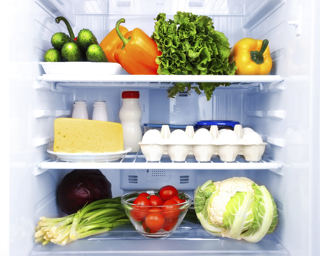

In [ ]:
display(widgets.HTML(value=markdown.markdown(_load_stored_json("extract_veg_ing_t"))))
display(format_image(f"{SAMPLE_IMG_DIR}/{annotations['images'][-1]['file_name']}"))